In [21]:
import numpy as np
import sympy as sp
import control as ct
import matplotlib.pyplot as plt

nomor 1

In [15]:
g_num = np.array([100])
g_den = np.array([1, 28, 190, 600])

sys1_tf= ct.TransferFunction(g_num, g_den)
print (sys1_tf)
zg= ct.zeros(sys1_tf)
pg= ct.poles(sys1_tf)
print ( "zeros : ", zg, "poles : ", pg)


<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


           100
--------------------------
s^3 + 28 s^2 + 190 s + 600

zeros :  [] poles :  [-20.+0.j          -4.+3.74165739j  -4.-3.74165739j]


<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            1
--------------------------
s^3 + 28 s^2 + 190 s + 600



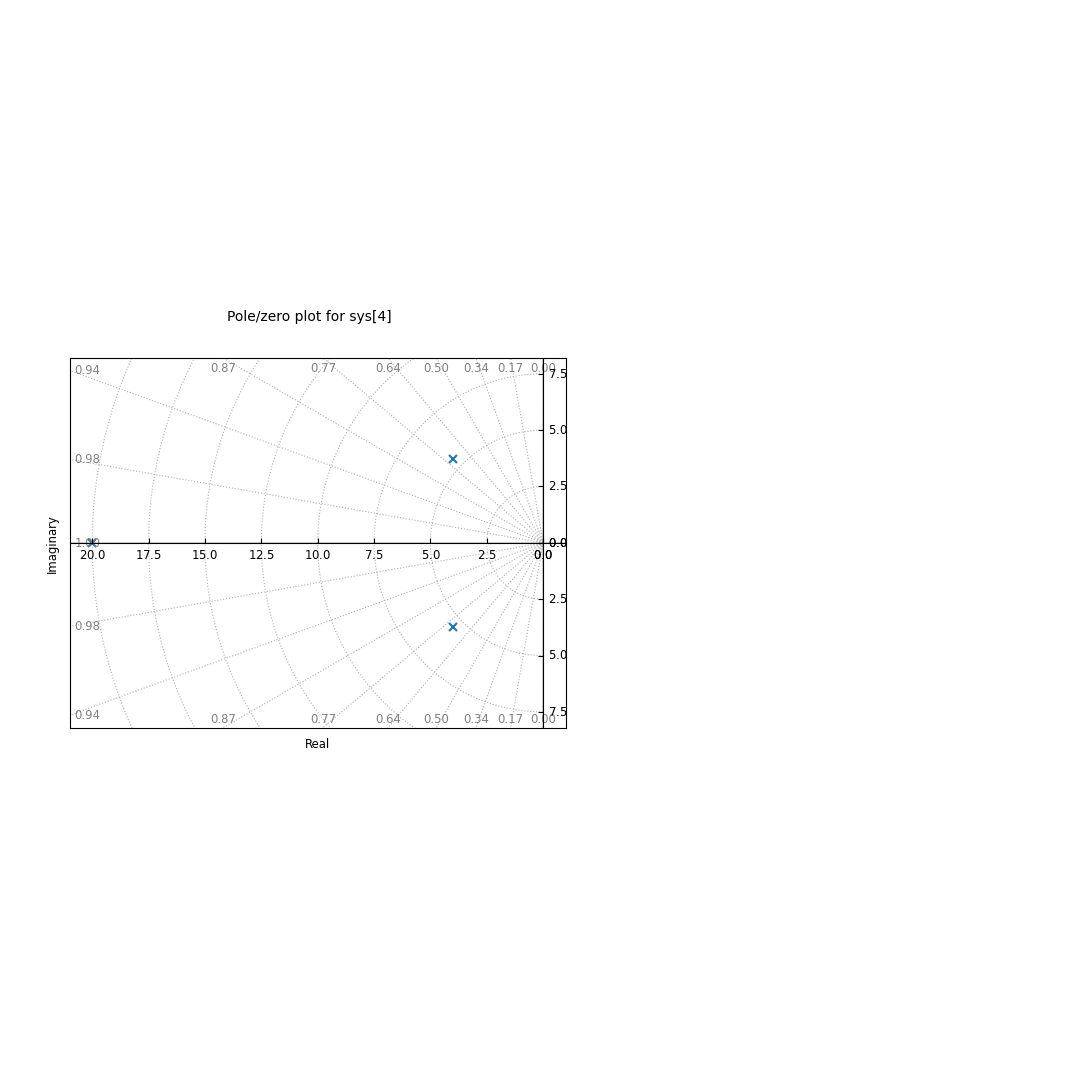

In [10]:
k=1
sys_zpk= ct.zpk(zg, pg, k)
print(sys_zpk)
ct.pole_zero_plot(sys_zpk, grid = True)

In [12]:
s= sp.symbols('s')
sysG_poly = ((100)/(s**3+28*s**2+190*s+600))

g= sp.apart(sysG_poly)
print("G(s) :", g)

G(s) : -10*(s - 12)/(27*(s**2 + 8*s + 30)) + 10/(27*(s + 20))


In [14]:
sys1_ss= ct.tf2ss(g_num, g_den)
print (sys1_ss)

<StateSpace>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ -28. -190. -600.]
     [   1.    0.    0.]
     [   0.    1.    0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[  0.   0. 100.]]

D = [[0.]]



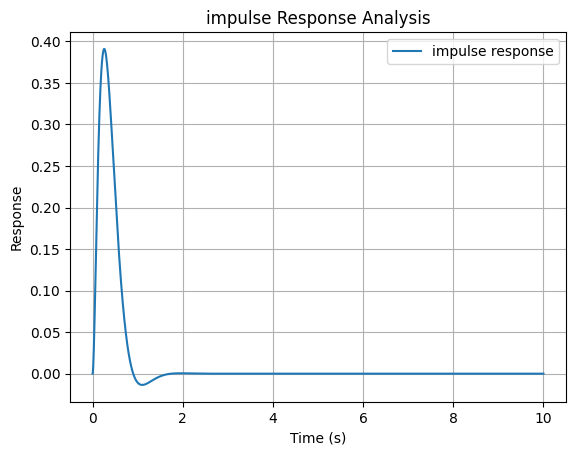

In [25]:
t1, y1= ct.impulse_response(sys1_tf)
t2, y2= ct.impulse_response(sys1_tf, 10)

plt.plot(t2, y2, label ="impulse response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.title("impulse Response Analysis")
plt.legend()
plt.grid()
plt.show()



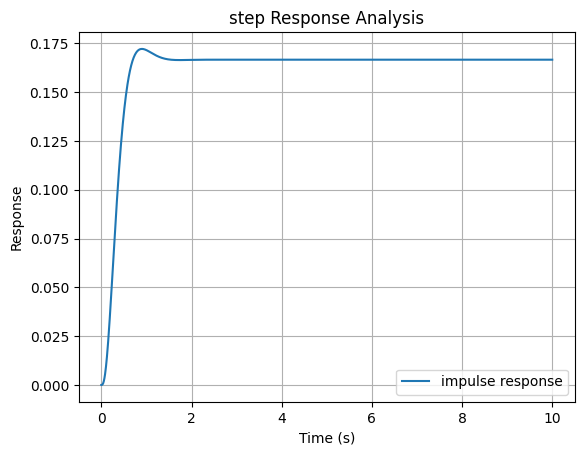

In [32]:
t2, y2= ct.step_response(sys1_tf, 10)

plt.plot(t2, y2, label ="impulse response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.title("step Response Analysis")
plt.legend()
plt.grid()
plt.show()

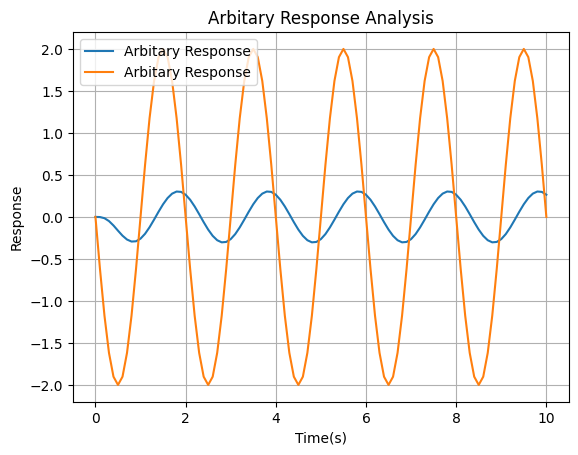

Peak : 0.3025
Steady-state value : 0.2641)


In [38]:
t = np.arange(0, 10.1, 0.1)
u = 2*np.cos((np.pi*t)+(np.pi/2))

time, y_out = ct.forced_response(sys1_tf, T= t, U= u)
plt.plot(time, y_out, label="Arbitary Response")
plt.plot(time, u, label="Arbitary Response")
plt.xlabel("Time(s)")
plt.ylabel("Response")
plt.title("Arbitary Response Analysis")
plt.legend()
plt.grid()
plt.show()

print (f"Peak : {np.max(y_out):.4f}")
print(f"Steady-state value : {y_out[-1]:.4f})")

In [34]:
num_m = 1
den_m = 1.5, 1.5, 2

m_tf=ct.TransferFunction(num_m, den_m)
m_ss= ct.tf2ss(m_tf)
print(m_tf)
print(m_ss)

<TransferFunction>: sys[43]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1
-------------------
1.5 s^2 + 1.5 s + 2

<StateSpace>: sys[43]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[-1.         -1.33333333]
     [ 1.          0.        ]]

B = [[1.]
     [0.]]

C = [[0.         0.66666667]]

D = [[0.]]



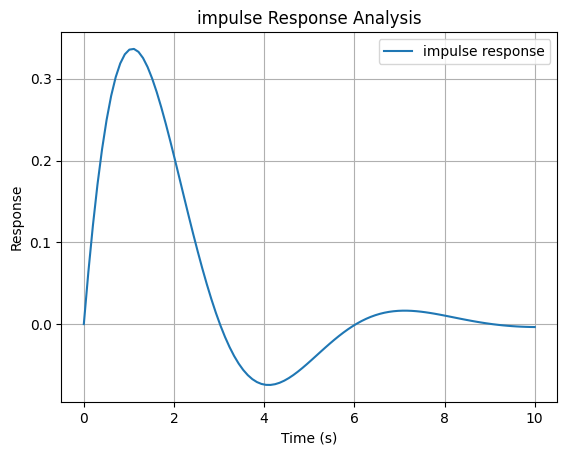

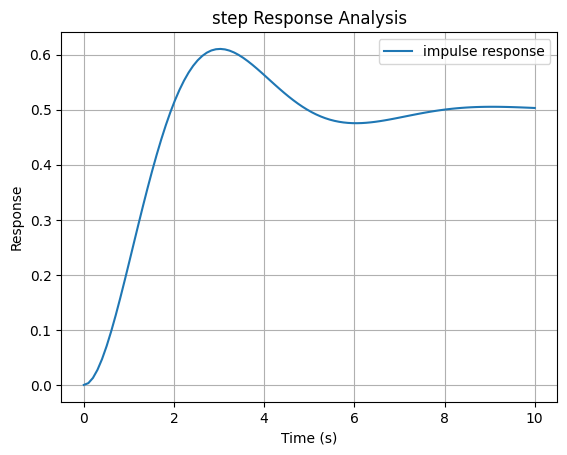

In [37]:

tm, ym= ct.impulse_response(m_tf, 10)

plt.plot(tm, ym, label ="impulse response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.title("impulse Response Analysis")
plt.legend()
plt.grid()
plt.show()

tm2, ym2= ct.step_response(m_tf, 10)

plt.plot(tm2, ym2, label ="impulse response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.title("step Response Analysis")
plt.legend()
plt.grid()
plt.show()